In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams.update({'font.size': 22})

In [5]:
m = 1
δm = 1
M = m + δm
g = 1
μ = m/M
Ω = 2*g*μ


In [6]:
def Params(N,L,s,μ,g,Ω):
    e = np.linspace(1,N,N)
    a = np.linspace(1,N,N)
    b = np.linspace(1,L,L)
    
    ω_0 = np.sqrt(4*g)
    ω_e = ω_0*np.sin(np.pi*(2*e-1)/(2*(2*N+1)))
    ω_a = ω_0*np.sin(np.pi*(2*a-1)/(2*(2*N+1)))
    ω_b = ω_0*np.sin(np.pi*b/(2*(L+1)))
    
    ϵ_bp = -g*np.sqrt(2*μ/(L+1))*np.sin(L*np.pi*b/(L+1))
    ϵ_bm = -g*np.sqrt(2*μ/(L+1))*np.sin(np.pi*b/(L+1))
    ϵ_a = -2*g*np.sqrt(μ/(2*N+1))*np.sin(np.pi*(2*a-1)/(2*N+1))
    ϵ_e = -2*g*np.sqrt(μ/(2*N+1))*np.sin(np.pi*(2*e-1)/(2*N+1))
    
    n = len(s)
    t_1,t_2,t_3 = np.zeros((n,1)),np.zeros((n,1)),np.zeros((n,1))
    for i in range(n):
        t_1 = np.sum(ϵ_e**2/(s[i]**2 + ω_e**2))
        t_2 = np.sum(ϵ_bm**2/(s[i]**2+ω_b**2))
        t_3 = np.sum(ϵ_bm*ϵ_bp/(s[i]**2+ω_b**2))
    
    G_p = s**2 + Ω**2 - t_1 - t_2 - t_3  
    G_m = s**2 + Ω**2 - t_1 - t_2 + t_3 
    
    return (ω_e,ω_b,G_p,G_m)

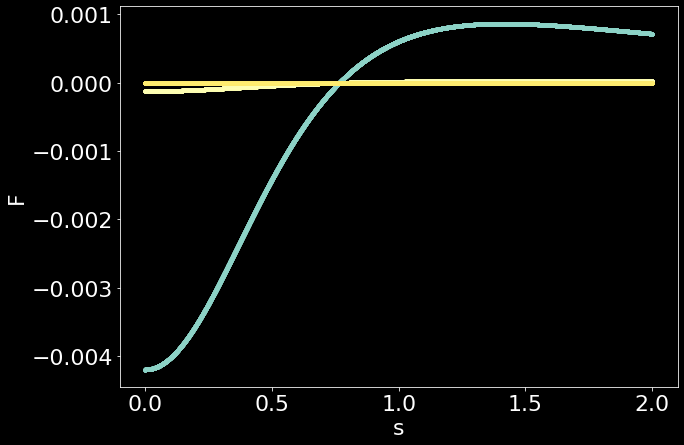

In [7]:
n = 10000
s = np.linspace(0,2,n)
size = 100
L = np.linspace(1,size,size,dtype=int)

N_sites = 500

#Second config
Ls = 250
Ns = N_sites - Ls
ω_es, ω_bs, G_ps, G_ms = Params(Ns, Ls, s, μ, g, Ω)

Energy = np.zeros((size,1))

plt.figure()

for i in range(size):
    #First config
    Lf = L[i]
    Nf = N_sites - Lf
    ω_ef, ω_bf, G_pf, G_mf = Params(Nf, Lf, s, μ, g, Ω)
    
    f = G_pf*G_mf/(G_ps*G_ms)
    
    Energy[i] = np.sum(ω_ef)-np.sum(ω_es)+np.sum(ω_bf)-np.sum(ω_bs)+cumtrapz(np.log(f),s)[-1]
    plt.plot(s,np.log(f),'.')

plt.xlabel('s')
plt.ylabel('F')
plt.show()

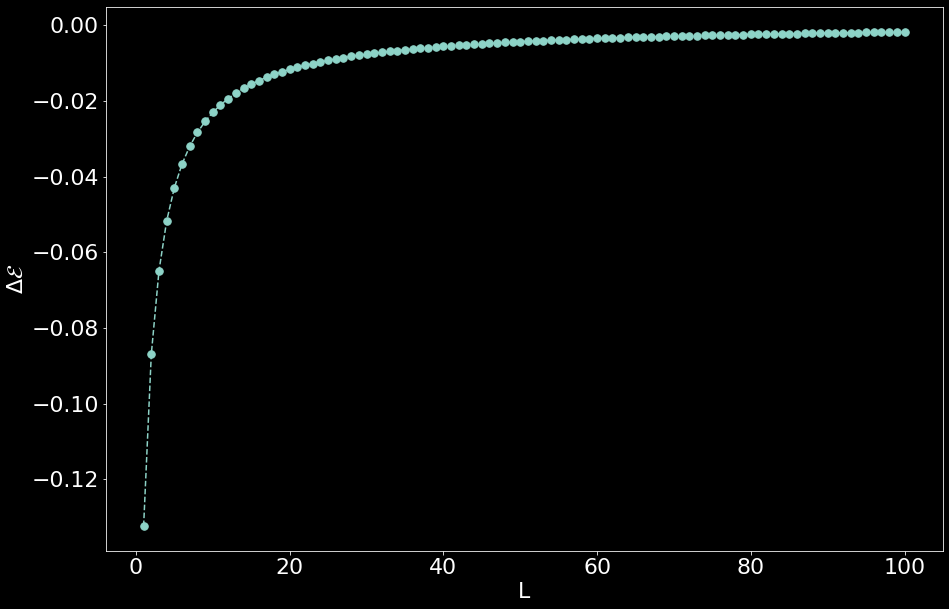

In [18]:
plt.plot(L,Energy,'.--',ms=15)
plt.xlabel('L')
plt.ylabel('$\Delta \mathcal{E}$')
plt.savefig("Caseng.png",dpi=400,transparent=True)